**Partie  : Importation des bibliothèques et chargement des données**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

*1- Télécharger  base de données*

In [4]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [5]:
import pandas as pd
data = pd.read_csv('titanic.csv')

In [6]:
data = pd.read_csv('titanic.csv')
data.shape

(891, 12)

*2- Un résumé statistique des données*

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*3-la liste des noms de colonnes*

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*4-le nombre de valeurs nulles dans chaque colonne*

In [9]:
selected_features=data[['Age','Sex','Fare','Survived']]
selected_features.isnull().sum()


Age         177
Sex           0
Fare          0
Survived      0
dtype: int64

In [10]:
selected_features.dropna(inplace=True)
selected_features.isnull().sum()
selected_features.shape

<ipython-input-10-ceed6fc82fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.dropna(inplace=True)


(714, 4)

*5-Visualiser les données*

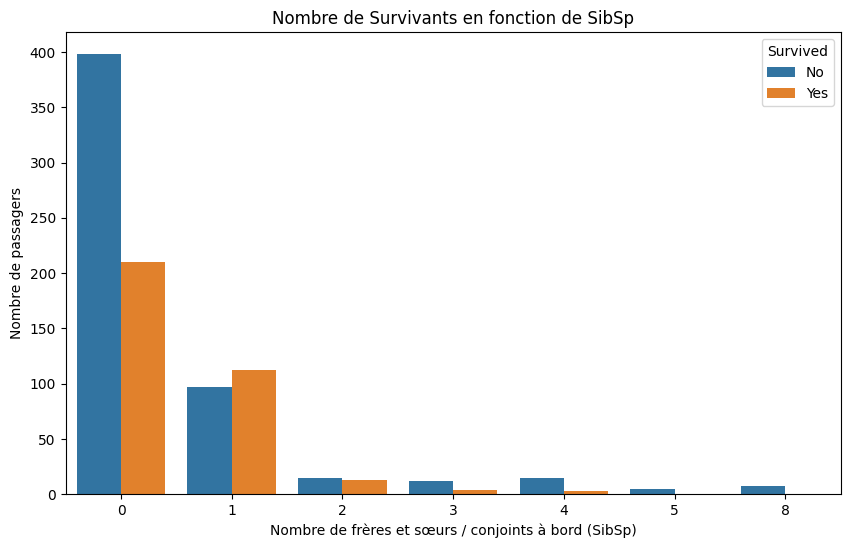

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données et créer un DataFrame
# Supposons que vous ayez déjà un DataFrame appelé 'data' avec les données chargées

# Diagramme en barres
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=data)
plt.title('Nombre de Survivants en fonction de SibSp')
plt.xlabel('Nombre de frères et sœurs / conjoints à bord (SibSp)')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])  # Légende pour les valeurs Survived
plt.show()


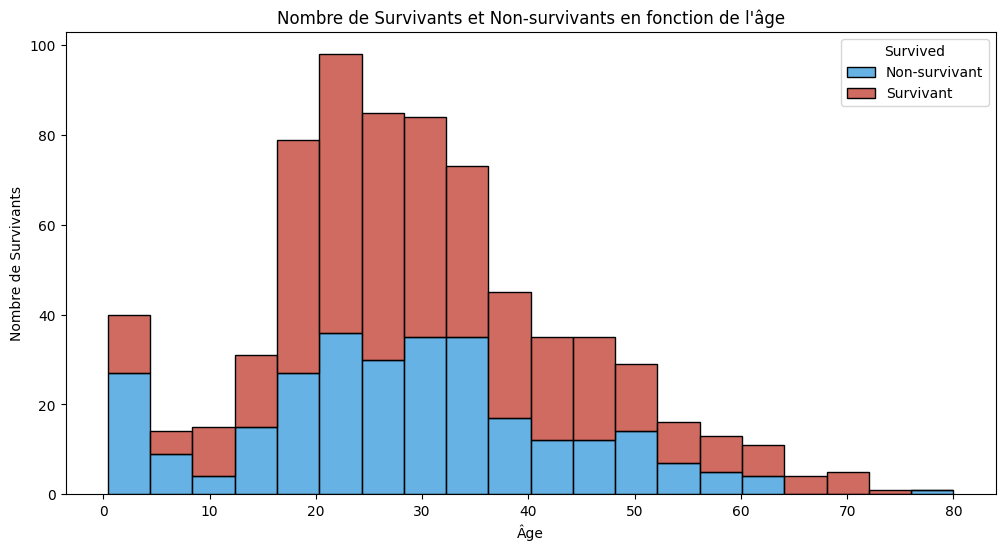

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagramme en barres
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', palette=["#C0392B", "#3498DB"])
plt.title('Nombre de Survivants et Non-survivants en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de Survivants')
plt.legend(title='Survived', loc='upper right', labels=['Non-survivant', 'Survivant'])
plt.show()


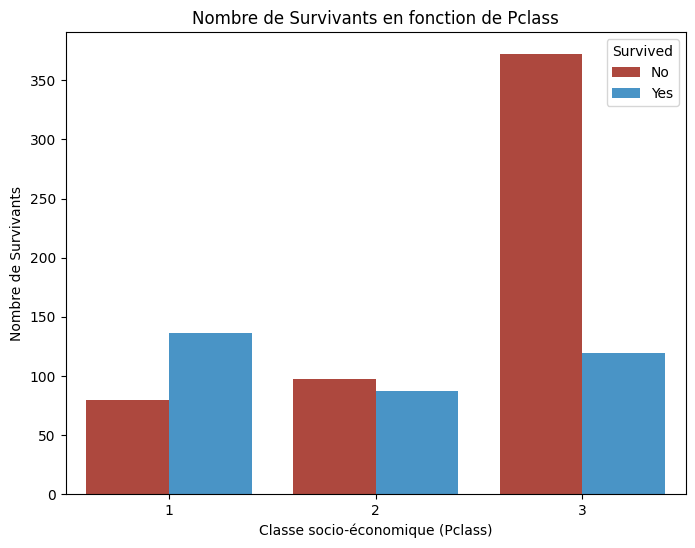

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les couleurs personnalisées
custom_colors = ["#C0392B", "#3498DB"]  # Rouge pour "No" (non survécu) et bleu pour "Yes" (survécu)

# Diagramme en barres avec des couleurs personnalisées
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette=custom_colors)
plt.title('Nombre de Survivants en fonction de Pclass')
plt.xlabel('Classe socio-économique (Pclass)')
plt.ylabel('Nombre de Survivants')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])  # Légende pour les valeurs Survived
plt.show()

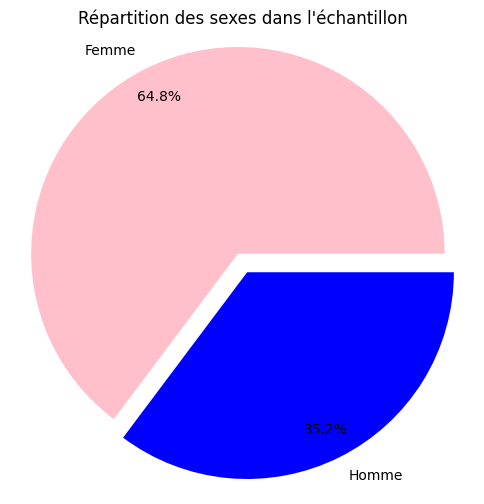

In [14]:
# Compter le nombre de femmes et d'hommes
gender_counts = data['Sex'].value_counts()

# Créer un camembert avec le texte à l'extérieur
plt.figure(figsize=(6, 6))
colors = ['pink', 'blue']
labels = ['Femme', 'Homme']
explode = (0.1, 0)  # Pour séparer légèrement le secteur "Femme"
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
plt.title("Répartition des sexes dans l'échantillon")
plt.axis('equal')  # Pour que le camembert soit un cercle

plt.show()

**Partie 2 : Creation du modéle**

 Machines à vecteurs de support (SVM)

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Chargement des données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques en les mettant à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un classificateur SVM
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Entraîner le classificateur SVM
svm_classifier.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm_classifier.predict(X_test_scaled)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


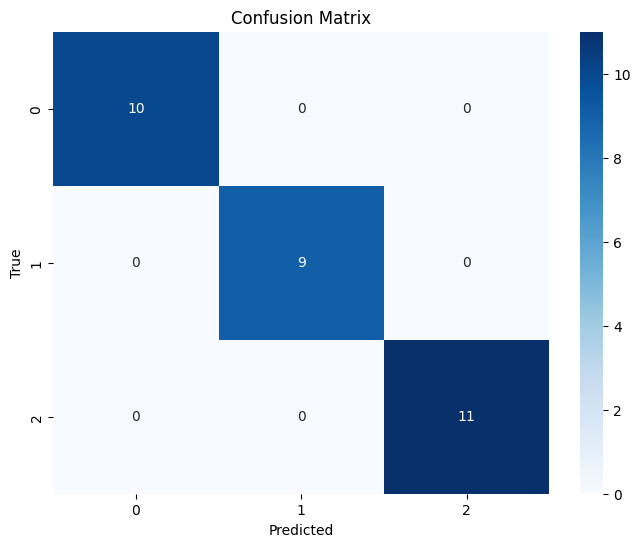

In [16]:
from sklearn.linear_model import LogisticRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to store the true values and predictions
predictions_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(predictions_df['True'], predictions_df['Predicted'], rownames=['True'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
